In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:

train_dir = '/content/drive/MyDrive/extracted_folder/For_Exposure/train_directory'
test_dir = '/content/drive/MyDrive/extracted_folder/For_Exposure/test_directory'

# Image size and batch
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 7242 images belonging to 4 classes.
Found 1824 images belonging to 4 classes.


In [10]:
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu',
        kernel_regularizer=regularizers.l2(0.001), input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(train_data, validation_data=test_data, epochs=20, callbacks=[early_stop])


Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 200s 872ms/step - accuracy: 0.5727 - loss: 1.2522 - val_accuracy: 0.7171 - val_loss: 0.8025
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 177s 777ms/step - accuracy: 0.7210 - loss: 0.7516 - val_accuracy: 0.7242 - val_loss: 0.7608
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 196s 863ms/step - accuracy: 0.7242 - loss: 0.7371 - val_accuracy: 0.7418 - val_loss: 0.7168
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 181s 772ms/step - accuracy: 0.7370 - loss: 0.7323 - val_accuracy: 0.7385 - val_loss: 0.7154
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 220s 850ms/step - accuracy: 0.7417 - loss: 0.7127 - val_accuracy: 0.7275 - val_loss: 0.7383
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 173s 763ms/step - accuracy: 0.7273 - loss: 0.7330 - val_accuracy: 0.7352 - val_loss: 0.7142
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 171s 753ms/step - accuracy: 0.7580 - loss: 0.6842 - val_accuracy: 0.7237 - val_loss: 0.7495
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 204s 763ms/step - accuracy: 0.7351 -

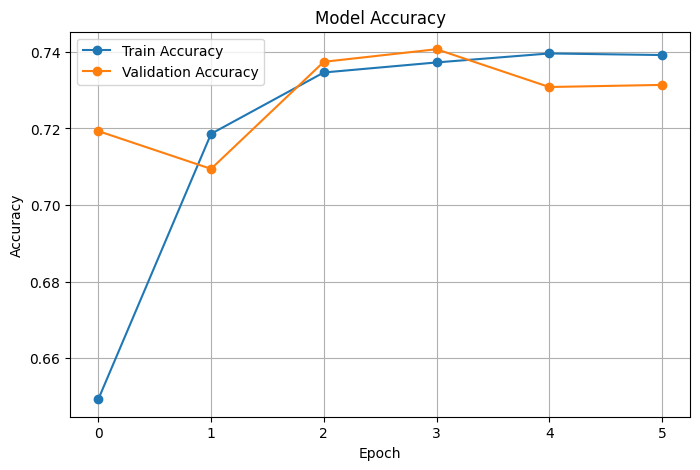

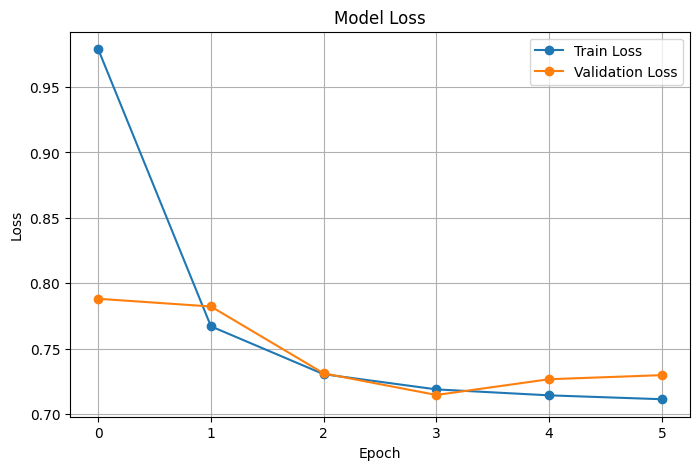

In [6]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss graph
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - accuracy: 0.6815 - loss: 0.7601
Test Loss: 0.7145
Test Accuracy: 0.7407


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/extracted_folder/For_Exposure/test_directory/OverExposed/a0003-NKIM_MG_8178_P1.5.JPG'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = np.argmax(pred)
class_names = list(train_data.class_indices.keys())

print("Predicted Class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Class: OverExposed


In [9]:
model.save('/content/drive/MyDrive/exposure_classifier_model.h5')
